In [1]:
from datetime import datetime
import csv
import xlwt
import os
import collections
import matplotlib.pyplot as plt
import matplotlib.pylab as py
import seaborn as sns
import pprint

import math
import matplotlib as mpl
from matplotlib import cm
from matplotlib import rc
import pandas as pd
import numpy as np
from IPython.display import HTML
import h5py
from tables import *
import gc
import vitables
import warnings
from pandas.tools.plotting import parallel_coordinates

In [2]:
from IPython.core.display import HTML
HTML("<style>.container { width:80% !important; }</style>")

In [3]:
%matplotlib inline

In [4]:
def readlisting(filename):
    try:
        filetxt=open(filename)
        line=filetxt.readline()
        idx=1
        while True:#going through header until 'Column' word is found
                line=filetxt.readline()
                idx+=1
                if len(line.split())>0:
                    if line.split()[0]=='Column':
                        break
            #print 'Header:',idx
        filetxt.readline()#skipping empty line after 'Column'
            
        data=[]#list
        while True:#writing variables into data
                line=filetxt.readline()
                #print line
                if len(line.split())==0:
                #if line.split()[0]=="\n":
                    break
                data.append(line.split()[1])#add only 2nd column
            
        #for a in data:
              #  print a
            
        filetxt.close()
        #print type(data)
        return data
    except:
        return 'Error, couldn\'t open the file'

In [5]:
def readsolution(filename):
    try:
        from xml.etree import ElementTree
        document = ElementTree.parse( filename )
        values=[]
        
        for variable in document.findall('variables/variable'): #go to variables section and read all variable subsections
             #values.append()=variable.attrib['value']
             if float(variable.attrib['value'])<0.000001:
                 values.append(str(0)) #write value of 'vlue' attribute
             else:
                 values.append(variable.attrib['value'])
        
        return values
    except:
        return 'Error, couldn\'t open the file'

In [6]:
class Vividict(dict):
        def __missing__(self, key):
            value = self[key] = type(self)()
            return value

In [7]:
def CustomCmap(from_rgb,to_rgb):

    # from color r,g,b
    r1,g1,b1 = from_rgb

    # to color r,g,b
    r2,g2,b2 = to_rgb

    cdict = {'red': ((0, r1, r1),
                   (1, r2, r2)),
           'green': ((0, g1, g1),
                    (1, g2, g2)),
           'blue': ((0, b1, b1),
                   (1, b2, b2))}

    cmap = mpl.colors.LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

In [8]:
warnings.filterwarnings('ignore')

In [ ]:
CFlimits=["04"]#05","04","03","02","01","0"

for CFname in CFlimits:
    #directory=r'T:\IEEE_case_study\Normal\GRIDUPGRADE\RETROFIT\SFH60\RelaxedUniInt_CHPBoiler_noPWL_noER0.2'
    if CFname=='0':
        directory=os.path.join(r'T:\IEEE_case_study\CarbAcc\GRIDUPGRADE\RETROFIT\SFH45\RelaxedUniInt_CHPboiler_noPWL_noER'+CFname)
    else:
        directory=os.path.join(r'T:\IEEE_case_study\CarbAcc\GRIDUPGRADE\RETROFIT\SFH45\RelaxedUniInt_CHPboiler_noPWL_noER'+CFname[0]+'.'+CFname[1])
    directories=os.listdir(directory)
    casename='CARB_RETRO45_RelaxedUniInt_CHPboiler_noPWL'+CFname
    #casename='NORM_RETRO60_RelaxedUniInt_CHPboiler_noPWL02'
    hdf=pd.HDFStore(r'T:\IEEE_case_study\dataNEW.h5') 

    ES=0
    DH_PWL=1

    try:
        h5objectives
    except:
        print ''
    else:
        del h5objectives

    try:
        pd_capacities
    except:
        print ''
    else:
        del pd_capacities


    for en,Dir in enumerate(directories):

        lisfile=os.path.join(directory,Dir,Dir+".lis")
        solfile=os.path.join(directory,Dir,'results'+Dir+".sol")

        if os.path.isfile(lisfile) and os.path.isfile(solfile):
            lis=readlisting(lisfile) 
            sol=readsolution(solfile)
            print 'Everything went well! :)'

        else:
            continue

        final=[]
        final=zip(lis,sol)

        ########################################
        ########  COST AND CARBON ##############
        ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        ICost_string="Investment_Cost"
        OCost_string="Operating_Cost"
        Em_string="Carbon_emissions"
        TCost_string="Total_Cost"
        gridupgrade="y_grid"
        grid=[]
        ICost=[]
        OCost=[]
        Em=[]
        TCost=[]
        pwl_a=[]
        pwl_b=[]
        pwl_c=[]

        for string in final:
            if ICost_string in string[0]:
              ICost.append(float(string[1]))  

            if OCost_string in string[0]:
              OCost.append(float(string[1])) 

            if TCost_string in string[0]:
              TCost.append(float(string[1])) 

            if gridupgrade in string[0]:
              grid.append(float(string[1])) 

            if Em_string in string[0]:
              Em.append(float(string[1])) 

            if 'cost_of_pwl_A' in string[0]:
                print 'cost_pwl_a:'+string[1]
                pwl_a.append(float(string[1])) 

            if 'cost_of_pwl_B' in string[0]:
                print 'cost_pwl_b:'+string[1]
                pwl_b.append(float(string[1]))

            if 'cost_of_pwl_C' in string[0]:
                print 'cost_pwl_c:'+string[1]
                pwl_c.append(float(string[1]))

        TCost=ICost[0]+OCost[0]
        print 'Total cost:'+str(TCost)
        print 'Emissions:'+str(Em)

        objpath=os.path.join(directory,Dir,"objectives.txt")#path to lis

        with open(objpath, "w") as text_file:

            text_file.write("Investment cost: %s \n" % ICost[0]) 
            text_file.write("Operating cost: %s \n" % OCost[0]) 
            text_file.write("Total cost: %s \n" % TCost) 
            text_file.write("Emissions: %s \n" % Em[0]) 
            if grid:
                text_file.write("Grid upgrade: %s \n" % grid[0]) 
            text_file.write("pwl a: %s \n" % pwl_a[0]) 
            text_file.write("pwl b: %s \n" % pwl_b[0]) 
            text_file.write("pwl c: %s \n" % pwl_c[0]) 

        # save to pandas dataframe

        if en==0: #if dataframe is not created yet
            if grid:
                df=np.matrix((ICost[0],OCost[0],TCost, Em[0], grid[0])) #variables have to be first transformed to array for dataframe
                h5objectives=pd.DataFrame(df,index=[Dir],columns=('Inv_cost','Oper_cost', 'Total_cost', 'Emissions', 'Grid_upgrade')) #name index based on the case
                h5objectives["Qsum"]=0
                h5objectives["DHconnections"]=0

            else:
                df=np.matrix((ICost[0],OCost[0],TCost, Em[0], 0)) #variables have to be first transformed to array for dataframe
                h5objectives=pd.DataFrame(df,index=[Dir],columns=('Inv_cost','Oper_cost', 'Total_cost', 'Emissions', 'Grid_upgrade')) #name index based on the case
                h5objectives["Qsum"]=0
                h5objectives["DHconnections"]=0 

        else: #if it is create temp dataframe and append it to existing one

            if grid:
                df=np.matrix((ICost[0],OCost[0],TCost, Em[0], grid[0]))
                h5objectivestemp=pd.DataFrame(df,index=[Dir],columns=('Inv_cost','Oper_cost', 'Total_cost', 'Emissions', 'Grid_upgrade')) #name index based on the case
                h5objectivestemp["Qsum"]=0
                h5objectivestemp["DHconnections"]=0
                h5objectives=h5objectives.append(h5objectivestemp)
                del h5objectivestemp

            else:
                df=np.matrix((ICost[0],OCost[0],TCost, Em[0], 0))
                h5objectivestemp=pd.DataFrame(df,index=[Dir],columns=('Inv_cost','Oper_cost', 'Total_cost', 'Emissions', 'Grid_upgrade')) #name index based on the case
                h5objectivestemp["Qsum"]=0
                h5objectivestemp["DHconnections"]=0
                h5objectives=h5objectives.append(h5objectivestemp)
                del h5objectivestemp



        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        ########################################
        ########  VOLTAGES       ###############
        ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        Voltages=Vividict()

        Voltages["VoltageA"]
        Voltages["VoltageB"]
        Voltages["VoltageC"]

        valuesA=[]
        valuesB=[]
        valuesC=[]

        for i in range (0, 78):

            string_nameA="VoltageBus"+str(i+1)+"("
            string_nameB="B_VoltageBus"+str(i+1)+"("
            string_nameC="C_VoltageBus"+str(i+1)+"("

            for string in final:

                if (string_nameA in string[0]) and not(string_nameB in string[0]) and not(string_nameC in string[0]):
                    valuesA.append(float(string[1])) # valuesA.append(2-float(string[1]))2 jer treba okrenut profil oko 1 pu

                if (string_nameB in string[0]) :
                    valuesB.append(float(string[1])) # valuesB.append(2-float(string[1])) 2 jer treba okrenut profil oko 1 pu

                if (string_nameC in string[0]) :
                    valuesC.append(float(string[1])) # valuesC.append(2-float(string[1])) 2 jer treba okrenut profil oko 1 pu

            if len(valuesA)>0:
                Voltages["VoltageA"][string_nameA[:len(string_nameA)-1]]=valuesA

            if len(valuesB)>0:
                Voltages["VoltageB"][string_nameB[2:len(string_nameB)-1]]=valuesB

            if len(valuesC)>0:
                Voltages["VoltageC"][string_nameC[2:len(string_nameC)-1]]=valuesC

            valuesA=[]
            valuesB=[]
            valuesC=[]

        #PHASE A # prepare for saving it to h5 file

        pd_dataA=pd.DataFrame.from_dict(Voltages["VoltageA"]) #extract data from dictionary and transform it to pandas dataframe format
        pd_dataA.columns=[pd_dataA.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataA.columns.values.tolist()))] #lose string names
        col=pd_dataA.columns.values #get column values
        col2=sorted(col, key=int) # sort ascending the bus numbers
        pd_dataA=pd_dataA.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names

        hdf.put('Voltages/'+casename+'/'+Dir+'/VoltageA', pd_dataA, format='table', data_columns=True) #save it to h5 file

        #PHASE B # prepare for saving it to h5 file

        pd_dataB=pd.DataFrame.from_dict(Voltages["VoltageB"]) #extract data from dictionary and transform it to pandas dataframe format
        pd_dataB.columns=[pd_dataB.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataB.columns.values.tolist()))] #lose string names
        col=pd_dataB.columns.values
        col2=sorted(col, key=int) # sort ascending the bus numbers 
        pd_dataB=pd_dataB.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names

        hdf.put('Voltages/'+casename+'/'+Dir+'/VoltageB', pd_dataB, format='table', data_columns=True) #save it to h5 file

        #PHASE C # prepare for saving it to h5 file

        pd_dataC=pd.DataFrame.from_dict(Voltages["VoltageC"]) #extract data from dictionary and transform it to pandas dataframe format
        pd_dataC.columns=[pd_dataC.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataC.columns.values.tolist()))] #lose string names
        col=pd_dataC.columns.values
        col2=sorted(col, key=int) # sort ascending the bus numbers 
        pd_dataC=pd_dataC.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names

        hdf.put('Voltages/'+casename+'/'+Dir+'/VoltageC', pd_dataC, format='table', data_columns=True) #save it to h5 file

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        ########################################
        ########  CURRENTS       ###############
        ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        Currents = Vividict()

        Currents["CurrentA"]
        Currents["CurrentB"]
        Currents["CurrentC"]

        lines=[12,23,24,45,46,67,68,89,810,1011,1112,1113,1314,1315,1516,1517,1718,1019,1920,2021,2022,2223,2224,
               2425,1926,2627,2628,2829,2830,3031,3132,3234,3233,3135,3536,3537,3738,3739,3940,3941,4142,4143,4344,
               4345,4546,4547,4748,4749,4950,4951,5152,5153,5354,5355,5556,5557,5758,5759,5960,3061,6162,6163,6364,
               6365,6566,6567,6768,6769,6970,6971,7172,7173,7374,7375,7576,7577,7778]

        valuesA=[]
        valuesB=[]
        valuesC=[]

        for i in lines:

            string_nameA='I'+str(i)+"squared("
            string_nameB="B_I"+str(i)+"squared("
            string_nameC="C_I"+str(i)+"squared("

            for string in final:

                if (string_nameA in string[0]) and not(string_nameB in string[0]) and not(string_nameC in string[0]):
                    valuesA.append(math.sqrt(float(string[1])))

                if string_nameB in string[0]:
                    valuesB.append(math.sqrt(float(string[1])))

                if string_nameC in string[0]:
                    valuesC.append(math.sqrt(float(string[1])))

            if len(valuesA)>0:
                Currents["CurrentA"][string_nameA[:len(string_nameA)-8]]=valuesA

            if len(valuesB)>0:
                Currents["CurrentB"][string_nameB[2:len(string_nameB)-8]]=valuesB

            if len(valuesC)>0:
                Currents["CurrentC"][string_nameC[2:len(string_nameC)-8]]=valuesC

            valuesA=[]
            valuesB=[]
            valuesC=[]

        pd_dataA=pd.DataFrame.from_dict(Currents["CurrentA"]) #extract data from dictionary and transform it to pandas dataframe format
        hdf.put('Currents/'+casename+'/'+Dir+'/CurentA', pd_dataA, format='table', data_columns=True) #save it to h5 file

        pd_dataB=pd.DataFrame.from_dict(Currents["CurrentB"]) #extract data from dictionary and transform it to pandas dataframe format
        hdf.put('Currents/'+casename+'/'+Dir+'/CurentB', pd_dataB, format='table', data_columns=True) #save it to h5 file

        pd_dataC=pd.DataFrame.from_dict(Currents["CurrentC"]) #extract data from dictionary and transform it to pandas dataframe format
        hdf.put('Currents/'+casename+'/'+Dir+'/CurentC', pd_dataC, format='table', data_columns=True) #save it to h5 file

        ##########
        ###PLOT###
        ##########
        #
        sns.set_style("white")
        flatui = sns.husl_palette(2, h=0.08, l=0.6)
        fig=plt.figure()
        n=[i+1 for i in range(0,288)]
        plt.plot(n,Currents["CurrentB"]["I12"], color=flatui[0], label='I12 B phase')
        plt.plot(n,Currents["CurrentC"]["I12"], color=flatui[1], label='I12 C phase')
        plt.legend(loc=0)
        plt.ylabel('Current (A)')
        plt.xlim([1, 288])
        plt.xticks(np.arange(0, 288+1, 24.0))
        #plt.show()
        path=os.path.join(directory,Dir,'current.png')#path to fig
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

        #voltages
        n=[i+1 for i in range(0,288)]
        fig=plt.figure()
        plt.plot(n,Voltages["VoltageB"]["VoltageBus75"], color=flatui[0] , label='Bus 75 B')
        plt.plot(n,Voltages["VoltageC"]["VoltageBus75"], color=flatui[1], label='Bus 75 C')
        plt.legend(loc=0)
        plt.ylabel('Voltage (p.u.)')
        plt.xlim([1, 288])
        plt.xticks(np.arange(0, 288+1, 24.0))
        #plt.show()
        path=os.path.join(directory,Dir,'voltage.png')#path to fig
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#     

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

            ########################################
            ########  GET CAPACITIES ###############
            ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        numberofbuildings=37

        Capacities = Vividict()

        Capacities["ASHP"]
        Capacities["CHP"]
        Capacities["Boiler"]
        Capacities["PV"]
        Capacities["HS"]
        Capacities["ER"]
        Capacities["ES"]
        Capacities["ES_pow"]

        for i in range(0,numberofbuildings):

            string_ASHP="P_ASHP_max("+str(i+1)+")"
            string_CHP="P_CHP_Max_ele("+str(i+1)+")"
            string_Boiler="H_Boiler_Max("+str(i+1)+")"
            string_PV="A_PV("+str(i+1)+")"
            string_HS="Storage_cap("+str(i+1)+")"
            string_ER="P_ER_Max("+str(i+1)+")"
            string_ES="EV_capacity("+str(i+1)+")"
            string_ES_power="EV_power("+str(i+1)+")"


            for string in final:

                if string_ASHP in string[0]:
                    Capacities["ASHP"][str(i+1)]=(math.ceil(float(string[1])))

                if string_CHP in string[0]:
                    Capacities["CHP"][str(i+1)]=(math.ceil(float(string[1])))

                if string_Boiler in string[0]:
                    Capacities["Boiler"][str(i+1)]=(math.ceil(float(string[1])))

                if string_PV in string[0]:
                    Capacities["PV"][str(i+1)]=(math.ceil(float(string[1])*0.15))

                if string_HS in string[0]:
                    Capacities["HS"][str(i+1)]=(math.ceil(float(string[1])))

                if string_ER in string[0]:
                    Capacities["ER"][str(i+1)]=(math.ceil(float(string[1])))  

                if ES==1:
                    if string_ES in string[0]:
                        Capacities["ES"][str(i+1)]=(math.ceil(float(string[1]))) 

                    if string_ES_power in string[0]:
                        Capacities["ES_pow"][str(i+1)]=(math.ceil(float(string[1]))) 

        if en==0:

            pd_capacities=pd.DataFrame.from_dict(Capacities).fillna(value=0)
            pd_capacities['Case']=Dir

        else:

            pd_capacitiestemp=pd.DataFrame.from_dict(Capacities).fillna(value=0)
            pd_capacitiestemp['Case']=Dir
            pd_capacities=pd_capacities.append(pd_capacitiestemp)

        ###########
        ## PLOT####
        ###########

        #flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
        #sns.palplot(sns.color_palette(flatui))
        current_palette = sns.husl_palette(7, h=0.08, l=0.6)
        #sns.palplot(current_palette)

        sns.set_style("whitegrid")

        n=[i+1 for i in range(0,37)] #37 is number of buildings
        bar_width=0.7
        fig=[]
        fig = plt.figure(figsize=(17,5))
        ax = fig.add_subplot(111)

        #plt.xticks(fontsize=10)  
        #plt.yticks(fontsize=10) 
        if ES==1:
            row_labels=['ASHP','CHP','Boiler', 'PV', 'ER','ES']
        else:
            row_labels=['ASHP','CHP','Boiler', 'PV', 'ER']

        column_labels=['Building'+str(i+1) for i in range(0, 37)]

        if ES==1:
            table_vals=[Capacities['ASHP'].values(), Capacities['CHP'].values(), Capacities['Boiler'].values(), Capacities['PV'].values(), Capacities['ER'].values(), Capacities['ES'].values()]
            row_colors=[current_palette[0], current_palette[1], current_palette[2], current_palette[3], current_palette[4], current_palette[5]]
            my_table=py.table(cellText=table_vals, colLabels=n, rowLabels=row_labels,  rowColours=row_colors, loc='bottom') #

        else:
            table_vals=[Capacities['ASHP'].values(), Capacities['CHP'].values(), Capacities['Boiler'].values(), Capacities['PV'].values(), Capacities['ER'].values()]
            row_colors=[current_palette[0], current_palette[1], current_palette[2], current_palette[3], current_palette[4]]
            my_table=py.table(cellText=table_vals, colLabels=n, rowLabels=row_labels,  rowColours=row_colors, loc='bottom') #


        ax.xaxis.label.set_fontsize(25)
        plt.bar(n, Capacities['ASHP'].values(), width=bar_width, color=current_palette[0], label='ASHP',align='center')

        plt.bar(n, Capacities['CHP'].values(), width=bar_width, color =current_palette[1], bottom = Capacities['ASHP'].values(), label='CHP',align='center')

        sum=[(k+Capacities['CHP'].values()[i]) for i,k in enumerate(Capacities['ASHP'].values())]

        ax.bar(n, Capacities['Boiler'].values(), width=bar_width, color =current_palette[2], bottom = sum, label='Boiler',align='center' )

        sum=[(sum[i]+Capacities['Boiler'].values()[i]) for i,k in enumerate(sum)]

        ax.bar(n, Capacities['PV'].values(), width=bar_width, color =current_palette[3], bottom = sum, label='PV',align='center' )

        sum=[(sum[i]+Capacities['PV'].values()[i]) for i,k in enumerate(sum)]

        ax.bar(n, Capacities['ER'].values(), width=bar_width, color =current_palette[4], bottom = sum, label='ER',align='center' )

        if ES==1:
            sum=[(sum[i]+Capacities['ER'].values()[i]) for i,k in enumerate(sum)]

            ax.bar(n, Capacities['ES'].values(), width=bar_width, color =current_palette[5], bottom = sum, label='ES',align='center' )

        #my_table.set_fontsize(11)[0]

        plt.xlim([1, 38])
        plt.xticks([])
        plt.ylabel('Capacities (kW)',fontsize=12)
        #plt.xlabel('Building',fontsize=12)
        #ax.grid(True)
        ax.autoscale(tight=True)
        ax.legend(loc=0)
        #plt.subplots_adjust(left=0.2, bottom=0.2)
        sns.despine(right=True, top=True, left=True)
        #fig.show()
        path=os.path.join(directory,Dir,'capacities.png')#path to lis
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#     

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

            ########################################
            ########  GET OPERATION  ###############
            ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        Operation=Vividict()

        Operation["HP"]
        Operation["CHP"]
        Operation["Boiler"]
        Operation["PV"]
        Operation["HS"]
        Operation["ES"]
        Operation["ES_charge"]


        valuesHP=[]
        valuesCHP=[]
        valuesBoiler=[]
        valuesPV=[]
        valuesHS=[]
        valuesGridExport=[]
        valuesES=[]
        valuesES_charge=[]


        for i in range(0 , 37):

            HP_string="P_elec_ASHP("+str(i+1)+","
            CHP_string="P_CHP_elec("+str(i+1)+","
            Boiler_string="H_Boiler("+str(i+1)+","
            PV_string="P_PV("+str(i+1)+","
            HS_string="Storage_energy("+str(i+1)+","
            GE_string="P_grid_export("+str(i+1)+","
            Q_string="Q_grid("+str(i+1)+","
            ES_charge="EV_charge("+str(i+1)+","
            ES_string="EV_capacity("+str(i+1)+","

            for string in final:

                if HP_string in string[0]:
                    valuesHP.append(float(string[1]))

                if (CHP_string in string[0]) :
                    valuesCHP.append(float(string[1]))

                if (Boiler_string in string[0]) :
                    valuesBoiler.append(float(string[1]))

                if (PV_string in string[0]) :
                    valuesPV.append(float(string[1]))

                if (HS_string in string[0]) :
                    valuesHS.append(float(string[1]))

                if (GE_string in string[0]) :
                    valuesGridExport.append(float(string[1]))

                if (ES_string in string[0]) :
                    valuesES.append(float(string[1]))

                if (ES_charge in string[0]) :
                    valuesES_charge.append(float(string[1]))

                #if (Q_string in string[0]) :
                    #valuesQ.append(float(string[1]))


            if len(valuesHP)>0:
                Operation["HP"][str(i+1)]=valuesHP

            if len(valuesCHP)>0:
                Operation["CHP"][str(i+1)]=valuesCHP

            if len(valuesBoiler)>0:
                Operation["Boiler"][str(i+1)]=valuesBoiler
                valuesGridExport

            if len(valuesPV)>0:
                Operation["PV"][str(i+1)]=valuesPV

            if len(valuesHS)>0:
                Operation["HS"][str(i+1)]=valuesHS

            if len(valuesGridExport)>0:
                Operation["GE"][str(i+1)]=valuesGridExport

            if len(valuesES)>0:
                Operation["ES"][str(i+1)]=valuesES

            if len(valuesES_charge)>0:
                Operation["ES_charge"][str(i+1)]=valuesES_charge

            #if len(valuesQ)>0:
                #Operation["Q"][str(i+1)]=valuesQ


            valuesHP=[]
            valuesCHP=[]
            valuesBoiler=[]
            valuesPV=[]
            valuesHS=[]
            valuesGridExport=[]
            valuesQ=[]
            valuesES=[]
            valuesES_charge=[]

        pd_opHP=pd.DataFrame.from_dict(Operation["HP"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format
        pd_opCHP=pd.DataFrame.from_dict(Operation["CHP"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format
        pd_opBo=pd.DataFrame.from_dict(Operation["Boiler"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format
        pd_opPV=pd.DataFrame.from_dict(Operation["PV"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format
        pd_opGE=pd.DataFrame.from_dict(Operation["GE"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format
        pd_opES=pd.DataFrame.from_dict(Operation["ES"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format
        pd_opESch=pd.DataFrame.from_dict(Operation["ESch"]).fillna(value=0) #extract data from dictionary and transform it to pandas dataframe format


        hdf.put('Operation/'+casename+'/'+Dir+'/HP', pd_opHP, format='table', data_columns=True) #save it to h5 file
        hdf.put('Operation/'+casename+'/'+Dir+'/CHP', pd_opCHP, format='table', data_columns=True) #save it to h5 file
        hdf.put('Operation/'+casename+'/'+Dir+'/Boiler', pd_opBo, format='table', data_columns=True) #save it to h5 file
        hdf.put('Operation/'+casename+'/'+Dir+'/PV', pd_opPV, format='table', data_columns=True) #save it to h5 file
        hdf.put('Operation/'+casename+'/'+Dir+'/GE', pd_opGE, format='table', data_columns=True) #save it to h5 file
        hdf.put('Operation/'+casename+'/'+Dir+'/ES', pd_opES, format='table', data_columns=True) #save it to h5 file
        hdf.put('Operation/'+casename+'/'+Dir+'/ESch', pd_opESch, format='table', data_columns=True) #save it to h5 file

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#     

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        ########################################
        ########  DISTRICT HEATING #############
        ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

        #############
        ##extract data
        ##############

        if DH_PWL==1:
            y_Pipeline=[string for string in final if 'y_pipeline' in string[0]]  #this is equivalent to above snippet
        else:
            y_Pipeline=[string for string in final if 'y_Pipeline' in string[0]]  #this is equivalent to above snippet

        maxQ=[string for string in final if 'maxQ' in string[0]]
        #DHcost_aimms=[string for string in final if 'DHcost' in string[0]]

        buildings=[]  
        if DH_PWL==1:
            for i in range(len(y_Pipeline)):
              buildings.append(maxQ[i][0].split('(')[1].split(')')[0].split(','))#extract indices from name for from which to which building
        else:
            for i in range(len(y_Pipeline)):
              buildings.append(y_Pipeline[i][0].split('(')[1].split(')')[0].split(','))#extract indices from name for from which to which building

        heatnetwork=np.zeros((37,37)) #fill array with 0s
        y_network=np.zeros((37,37))
        DH_cost_matrix=np.zeros((37,37))
        numberofconnections=0 
        for i in range(len(buildings)): #write connection values to matrix
                r=int(buildings[i][0])-1 
                c= int(buildings[i][1])-1
                if DH_PWL==1:
                    heatnetwork[r][c]=float(maxQ[i][1] )  
                    y_network[r][c]=float(y_Pipeline[i][1] )
                    #DH_cost_matrix[r][c]=float(DHcost_aimms[i][1] )
                else:
                    y_network[r][c]=float(y_Pipeline[i][1] )

        if DH_PWL==1:
            pd_heatnetwork=pd.DataFrame(heatnetwork)
        else:
            pd_heatnetwork=pd.DataFrame(y_network)

        ############################
        #extract values for plot
        ###############################

        DH=Vividict()
        DH["Q"]
        Qsum=np.zeros((37,37))
        valuesQ=[]
        sumQ=0
        for i in range(0 , 37):
            for j in range (0 , 37):
                if pd_heatnetwork.as_matrix()[i][j]>0: # check if conn exists
                    Q_string="Q_grid("+str(i+1)+","+str(j+1)+","

                    for string in final:
                        if (Q_string in string[0]) :
                            valuesQ.append(float(string[1]))

                    if len(valuesQ)>0:
                        DH["Q"][str(i+1)][str(j+1)]=valuesQ # Q exchanged per timestep per connection

                else:
                    continue
                valuesQ=[]
                for vals in DH["Q"][str(i+1)][str(j+1)]:
                    sumQ+=vals
                Qsum[i,j]=sumQ#get total heat exchanged per connection

                h5objectives["Qsum"][Dir]=h5objectives["Qsum"][Dir]+sumQ #save to h5 file

                sumQ=0
            valuesQ=[]
            sumQ=0 

        #pd_DH=pd.DataFrame.from_dict(DH["Q"])
        #hdf.put('DH/'+casename, pd_DH, format='table', data_columns=True)

        #################
        ### THE big plot
        ################

        coords=np.genfromtxt(r'C:\Users\mobo\OneDrive\0PhD\!PhD\IEEE low voltage case study\Buildingcoords.txt') #house coordinates from txt file
        bldnumorder2=[[1], [15], [2], [3], [16], [28], [4], [17], [5], [18], [29], [6], [30], [7], [31], [32], [19], [20], [33], [21], [8], [34], [22], [9], [23], [35], [10], [24], [11],
                      [36], [25], [12], [13], [14], [26], [37], [27]] #number of buildings as in aimms
        dummy=np.append(coords,bldnumorder2,1) #add number of buildings to the coords
        dummy=dummy[dummy[:,2].argsort()] #sort the array based on building number as in aimms
        coords=dummy[:,:2] #delete building number to have only coords which are now ordered base on how it shows in AIMMS to match it with number in heatnetwork
        dummy=[]


        connections=pd_heatnetwork.as_matrix()
        #connections=Qsum
        shapec=connections.shape
        connectedbuildings=[]
        Qcolor=[]

        for i in xrange(0,shapec[0]): #if buildings are connected, add their coords to new list
              for j in xrange(0,shapec[1]):
                    if (connections[i,j]>0): 

                        h5objectives["DHconnections"][Dir]=h5objectives["DHconnections"][Dir]+1 #add to h5

                        connectedbuildings.append([coords[i], coords[j]])
                        Qcolor=np.append(Qcolor,Qsum[i,j])#get sum in order of connections
        connectedbuildings=np.array(connectedbuildings) #transfrom it from list to array


        fig=plt.figure(figsize=(13,8))
        ax=fig.add_axes([0.07, 0.09, 0.81, 0.82])
        ax.grid(False) #delete grid
        ax.tick_params(axis='both',color='black',length=4,width=1, direction='in') #add tick marks
        ax.set_yticklabels(np.arange(0, 160+1, 20.0).astype(int), minor=False, fontsize=15, rotation='horizontal')
        ax.set_xticklabels(np.arange(0, 160+1, 20.0).astype(int), minor=False, fontsize=15, rotation='horizontal')
        plt.xlabel('X(m)',fontsize=15)
        ax.xaxis.set_label_coords(0.98, -0.05) #move label to the end and not middle [x,y]
        plt.ylabel('Y(m)',fontsize=15)
        ax.yaxis.set_label_coords(-0.05, 0.98) #move label to the end and not middle [x,y]


        CHPvalue = Capacities['CHP'].values() #get chp capacities
        CHPcapacities_np = np.asarray(CHPvalue,dtype=int)
        mycolor=plt.cm.Set1(CHPcapacities_np[:]/float(np.amax(CHPcapacities_np))) #get color based on capacities



        ax.scatter(coords[:,0],coords[:,1],marker='s',s=70.0, c=mycolor[:],vmin=0, zorder=10) #plot all buildings as squares
        for i,house in enumerate(coords): #add number of building to square
                        ax.text(house[0]+1.5,house[1]+1,str(i+1), fontsize=15)

        counter=0

        #### CREATE CUSTOM COLORMAP
        LinL = np.loadtxt(r'C:\Users\mobo\OneDrive\0PhD\Python\Notebooks\rgb.txt')
        LinL=LinL/255.
        b3 = LinL[:,2] # value of blue at sample n
        b2 = LinL[:,2] # value of blue at sample n
        b1 = np.linspace(0, 1, len(b2)) # position of sample n - ranges from 0 to 1

        # Setting up columns for tuples
        g3 = LinL[:,1]
        g2 = LinL[:,1]
        g1 = np.linspace(0,1,len(g2))

        r3 = LinL[:,0]
        r2 = LinL[:,0]
        r1 = np.linspace(0,1,len(r2))

        # Creating tuples
        R = zip(r1,r2,r3)
        G = zip(g1,g2,g3)
        B = zip(b1,b2,b3)

        # Transposing
        RGB = zip(R,G,B)
        rgb = zip(*RGB)

        # Creating dictionary
        k = ['red', 'green', 'blue']
        LinearL = dict(zip(k,rgb))

        my_cmap = mpl.colors.LinearSegmentedColormap('custom', LinearL)

        ####

        ####assigne colors to each amount of heat energy exchanged
        if len(np.unique(Qcolor))>2:
            colors=my_cmap(Qcolor/int(np.amax(Qcolor)))  
        else:
            colors=my_cmap(Qcolor)
        ###   

        ###plot connections colored based on the amount heat exchanged
        for con in connectedbuildings:
                ax.arrow(con[0][0],con[0][1],(con[1][0]-con[0][0])/2,(con[1][1]-con[0][1])/2,width=0,length_includes_head=True,facecolor=colors[counter],head_length=1.2, head_width=2)#plot lines between connected buildings
                ax.plot([con[0][0],con[1][0]],[con[0][1],con[1][1]],linestyle='-',linewidth=2.2,color=colors[counter])#
                counter+=1
        ###

        ### add colorbar
        if len(Qcolor)>0:
            norm = mpl.colors.Normalize(vmin=int(np.amin(Qcolor)*30.4), vmax=int(np.amax(Qcolor)*30.4))
            bounds = np.linspace(int(np.amin(Qcolor)*30.4),int(np.amax(Qcolor)*30.4))  #,int(np.amax(Qcolor))
            if len(Qcolor)>0 and len(np.unique(Qcolor))>1:
                ax2 = fig.add_axes([0.89, 0.27, 0.02, 0.5])
                cb = mpl.colorbar.ColorbarBase(ax2, cmap=my_cmap,  norm=norm, spacing='proportional', boundaries=bounds)#, extendfrac='auto', ticks=[bounds[i] for i in range(int(np.amin(Q_sum_per_connection)), int(np.amax(Q_sum_per_connection)), (int(np.amax(Q_sum_per_connection))-int(np.amin(Q_sum_per_connection)))/10)],spacing='uniform'
                a=np.linspace(int(np.amin(Qcolor)*30.4), int(np.amax(Qcolor)*30.4),7)
                tickvalues=[]

                for i in a:
                    tickvalues=np.append(tickvalues,int(i))  
                ax2.tick_params(labelsize=15) 
                cb.set_ticks(tickvalues)
                cb.set_label('Heat energy (kWh/y)', fontsize=15) 
        ###

        ### add legend
        obj=[]
        labels=[]
        mycolor=plt.cm.Set1(np.unique(CHPcapacities_np[:])/float(np.amax(CHPcapacities_np)))
        for i,cpt in enumerate(np.unique(CHPcapacities_np[:])):
                obj.append(mpl.lines.Line2D(range(1),range(1),linestyle='',marker='s',color=mycolor[i]))
                labels.append(str(cpt)+' kW')
        legend=ax.legend(obj,labels,numpoints=1,loc='upper left', bbox_to_anchor=(0.7, 1.00), ncol=2, fancybox=True, shadow=False,title="CHP capacities",fontsize=15)
        plt.setp(legend.get_title(),fontsize=15)
        ###
        path=os.path.join(directory,Dir,'DH.png')#path to fig
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig
        #plt.show()
        #plt.close()


        #----------------------------------------------------------------------------------------------------------------------------------------------------------#     

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#

            ########################################
            ########  PANDAS AND SEABORN  ###############
            ########################################

        #----------------------------------------------------------------------------------------------------------------------------------------------------------#  

        #########
        ##Voltages
        #########

        #PHASE A
        pd_dataA=pd.DataFrame.from_dict(Voltages["VoltageA"]) #extract data from dictionary and transform it to pandas dataframe format
        pd_dataA.columns=[pd_dataA.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataA.columns.values.tolist()))] #lose string names
        col=pd_dataA.columns.values #get column values
        col2=sorted(col, key=int) # sort ascending the bus numbers
        pd_dataA=pd_dataA.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names
        fig = plt.figure(figsize=(20,6))
        ax = fig.add_subplot(111)
        sns.boxplot(data=pd_dataA, ax=ax)
        plt.xlabel('Bus')
        plt.ylabel('Voltage (p.u.)')
        plt.title("Phase A")
        sns.despine(right=True, top=True, left=True)
        #fig.show()
        path=os.path.join(directory,Dir,'VoltagePhaseA.png')#path to fig'VoltagePhaseA.png'
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

        #PHASE C
        pd_dataB=pd.DataFrame.from_dict(Voltages["VoltageB"]) #extract data from dictionary and transform it to pandas dataframe format
        pd_dataB.columns=[pd_dataB.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataB.columns.values.tolist()))] #lose string names
        col=pd_dataB.columns.values
        col2=sorted(col, key=int) # sort ascending the bus numbers 
        pd_dataB=pd_dataB.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names
        fig = plt.figure(figsize=(20,6))
        ax = fig.add_subplot(111)
        sns.boxplot(data=pd_dataB, ax=ax)
        plt.xlabel('Bus')
        plt.ylabel('Voltage (p.u.)')
        plt.title("Phase B")
        sns.despine(right=True, top=True, left=True)
        #fig.show()
        path=os.path.join(directory,Dir,'VoltagePhaseB.png')#path to lis
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

        #PHASE C
        pd_dataC=pd.DataFrame.from_dict(Voltages["VoltageC"]) #extract data from dictionary and transform it to pandas dataframe format
        pd_dataC.columns=[pd_dataC.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataC.columns.values.tolist()))] #lose string names
        col=pd_dataC.columns.values
        col2=sorted(col, key=int) # sort ascending the bus numbers 
        pd_dataC=pd_dataC.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names
        fig = plt.figure(figsize=(20,6))
        ax = fig.add_subplot(111)
        sns.boxplot(data=pd_dataC, ax=ax)
        plt.xlabel('Bus')
        plt.ylabel('Voltage (p.u.)')
        plt.title("Phase C")
        sns.despine(right=True, top=True, left=True)
        #fig.show()
        path=os.path.join(directory,Dir,'VoltagePhaseC.png')#path to lis
        fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

    hdf.put('Objectives/'+casename, h5objectives, format='table', data_columns=True)
    hdf.put('Capacities/'+casename, pd_capacities, format='table', data_columns=True)
    hdf.close()
    gc.collect() #garbage collector to reduce RAM usage

In [210]:
sns.set_context("notebook")
sns.set_style("white")

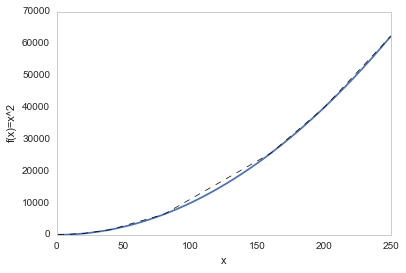

In [34]:
x=range(250)
y=np.square(x)

x1=[1, 20, 40, 80, 160, 200, 250]
y1=np.square (x1)

fig=plt.figure()
plt.plot(x,y, label='Bus 75 B',)
plt.plot(x1,y1, label='Bus 75 B',linestyle='dashed', linewidth=0.7, color='black')
ax = plt.gca()
ax.grid(False)
#plt.legend(loc=0)
plt.ylabel('f(x)=x^2', **{'verticalalignment'   : 'bottom'})
plt.xlabel('x')
#plt.xlim([1, 288])
#plt.xticks(np.arange(0, 288+1, 24.0))
#plt.show()
#path=os.path.join(directory,Dir,'voltage.png')#path to fig
fig.savefig(r'C:\Users\mobo\OneDrive\0PhD\!PhD\Thesis\PWL.png',bbox_inches='tight',dpi=500) #save the fig


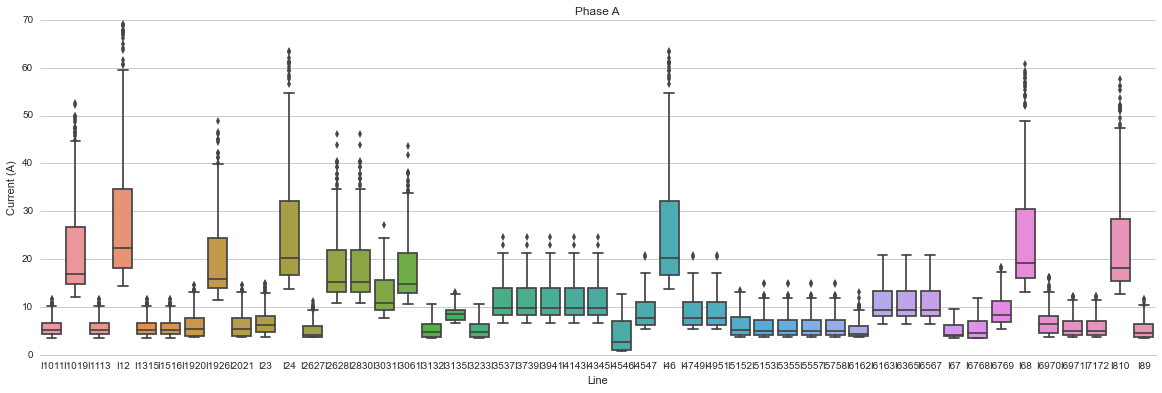

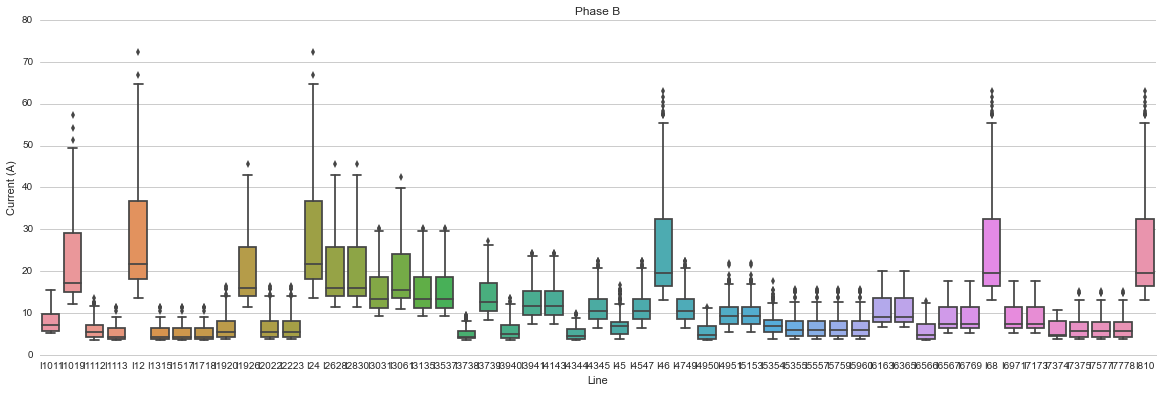

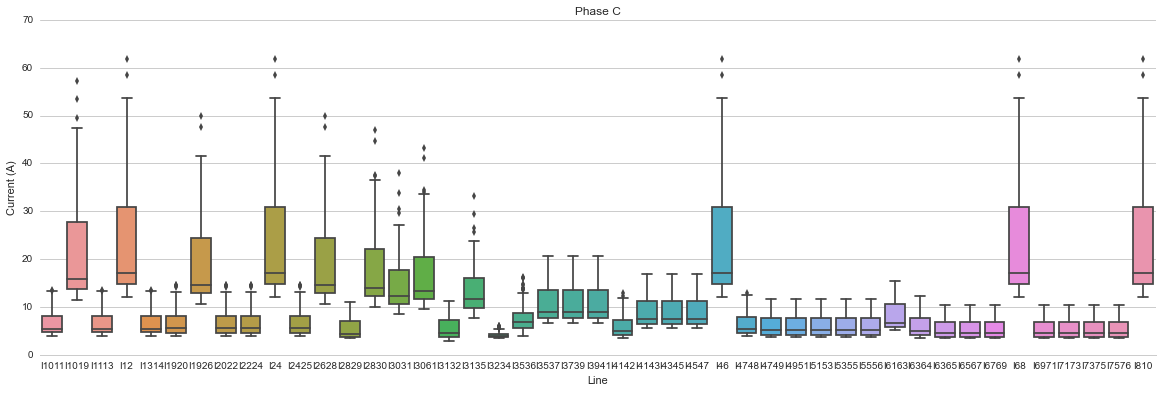

In [93]:
#PHASE A
pd_dataA=pd.DataFrame.from_dict(Currents["CurrentA"]) #extract data from dictionary and transform it to pandas dataframe format
#pd_dataA.columns=[pd_dataA.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataA.columns.values.tolist()))] #lose string names
#col=pd_dataA.columns.values #get column values
#col2=sorted(col, key=int) # sort ascending the bus numbers
#pd_dataA=pd_dataA.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
sns.boxplot(data=pd_dataA, ax=ax)
plt.xlabel('Line')
plt.ylabel('Current (A)')
plt.title("Phase A")
sns.despine(right=True, top=True, left=True)
#fig.show()
path=os.path.join(directory,Dir,'CurrentPhaseA.png')#path to fig'VoltagePhaseA.png'
fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

#PHASE C
pd_dataB=pd.DataFrame.from_dict(Currents["CurrentB"]) #extract data from dictionary and transform it to pandas dataframe format
#pd_dataB.columns=[pd_dataB.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataB.columns.values.tolist()))] #lose string names
#col=pd_dataB.columns.values
#col2=sorted(col, key=int) # sort ascending the bus numbers 
#pd_dataB=pd_dataB.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
sns.boxplot(data=pd_dataB, ax=ax)
plt.xlabel('Line')
plt.ylabel('Current (A)')
plt.title("Phase B")
sns.despine(right=True, top=True, left=True)
#fig.show()
path=os.path.join(directory,Dir,'CurrentPhaseB.png')#path to lis
fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig

#PHASE C
pd_dataC=pd.DataFrame.from_dict(Currents["CurrentC"]) #extract data from dictionary and transform it to pandas dataframe format
#pd_dataC.columns=[pd_dataC.columns.values.tolist()[i][10:] for i in range(0, len(pd_dataC.columns.values.tolist()))] #lose string names
#col=pd_dataC.columns.values
#col2=sorted(col, key=int) # sort ascending the bus numbers 
#pd_dataC=pd_dataC.reindex_axis(col2, axis=1) # reorder columns depending on the ordered names
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
sns.boxplot(data=pd_dataC, ax=ax)
plt.xlabel('Line')
plt.ylabel('Current (A)')
plt.title("Phase C")
sns.despine(right=True, top=True, left=True)
#fig.show()
path=os.path.join(directory,Dir,'CurrentPhaseC.png')#path to lis
fig.savefig(path,bbox_inches='tight',dpi=500) #save the fig